In [1]:
import sys
# setting path
sys.path.append("/home/ky2446/simclr")
sys.path.append("/home/ky2446/simclr/simclr")
sys.path.append("/home/ky2446/simclr/simclr/layers")
sys.path.append("/home/ky2446/simclr/simclr/models")
sys.path.append("/home/ky2446/simclr/simclr/loss")
sys.path.append("/home/ky2446/simclr/simclr/optim")
sys.path.append("/home/ky2446/simclr/simclr/dataloader")

In [2]:
from simclrpy import SimClr
from ntxent import nt_xent_loss
from ntxentgit import SimCLR_Loss
from augment import TransformsSimCLR
from utils import *
from LARS import LARS
from downstream import DownStream
from dataloader import *

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [4]:
train_loader_simclr = train_loader_simclr("CIFAR10",256)
test_loader = test_loader("CIFAR10",256)
test_images, test_labels = get_testimgs_list("CIFAR10")

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [5]:
proj_dim = 128
model = SimClr('resnet50',proj_dim).cuda()
temperature = 0.5
#criterion = nt_xent_loss
criterion = SimCLR_Loss(256,0.5)
optimizer = "LARS"
model, train_loss = train_simclr(train_loader_simclr,model,criterion,optimizer,100,256,True,"/home/ky2446/saved-models/CIFAR10-RES50-SIMCLR-BS-256-PD128-LARS")

/home/ky2446/simclr/simclr/optim/LARS.py:136: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272178570/work/torch/csrc/utils/python_arg_parser.cpp:1050.)
  next_v.mul_(momentum).add_(scaled_lr, grad)


Epoch: 0, step: 50/195, loss: 6.168970108032227
Epoch: 0, step: 100/195, loss: 5.967622756958008
Epoch: 0, step: 150/195, loss: 5.925634860992432
Epoch: 0 completed, average loss: 6.063665553851005, time taken: 0.9309518893559774 mins
Epoch: 1, step: 50/195, loss: 5.820556640625
Epoch: 1, step: 100/195, loss: 5.728549957275391
Epoch: 1, step: 150/195, loss: 5.59542179107666
Epoch: 1 completed, average loss: 5.760179213988475, time taken: 0.9212969144185384 mins
Epoch: 2, step: 50/195, loss: 5.602947235107422
Epoch: 2, step: 100/195, loss: 5.590295791625977
Epoch: 2, step: 150/195, loss: 5.510392665863037
Epoch: 2 completed, average loss: 5.529444183447422, time taken: 0.9255697170893351 mins
Epoch: 3, step: 50/195, loss: 5.470794677734375
Epoch: 3, step: 100/195, loss: 5.428382873535156
Epoch: 3, step: 150/195, loss: 5.33936882019043
Epoch: 3 completed, average loss: 5.384329235859406, time taken: 0.9229111949602763 mins
Epoch: 4, step: 50/195, loss: 5.275074481964111
Epoch: 4, step: 1

Epoch: 34 completed, average loss: 4.86924133789845, time taken: 0.9199025472005208 mins
Epoch: 35, step: 50/195, loss: 4.889798641204834
Epoch: 35, step: 100/195, loss: 4.865434169769287
Epoch: 35, step: 150/195, loss: 4.837170600891113
Epoch: 35 completed, average loss: 4.870574564811511, time taken: 0.9255959709485372 mins
Epoch: 36, step: 50/195, loss: 4.855586528778076
Epoch: 36, step: 100/195, loss: 4.90016508102417
Epoch: 36, step: 150/195, loss: 4.871793270111084
Epoch: 36 completed, average loss: 4.863760383312519, time taken: 0.9230629523595174 mins
Epoch: 37, step: 50/195, loss: 4.895244598388672
Epoch: 37, step: 100/195, loss: 4.838079452514648
Epoch: 37, step: 150/195, loss: 4.833694934844971
Epoch: 37 completed, average loss: 4.863936221293914, time taken: 0.928778330485026 mins
Epoch: 38, step: 50/195, loss: 4.815175533294678
Epoch: 38, step: 100/195, loss: 4.895715713500977
Epoch: 38, step: 150/195, loss: 4.855920791625977
Epoch: 38 completed, average loss: 4.8555637408

Epoch: 69, step: 50/195, loss: 4.822323799133301
Epoch: 69, step: 100/195, loss: 4.814709663391113
Epoch: 69, step: 150/195, loss: 4.783661365509033
Epoch: 69 completed, average loss: 4.800404499738645, time taken: 0.9239292701085409 mins
Epoch: 70, step: 50/195, loss: 4.8512701988220215
Epoch: 70, step: 100/195, loss: 4.736685276031494
Epoch: 70, step: 150/195, loss: 4.77169942855835
Epoch: 70 completed, average loss: 4.802770494803404, time taken: 0.924471131960551 mins
Epoch: 71, step: 50/195, loss: 4.829381942749023
Epoch: 71, step: 100/195, loss: 4.771841526031494
Epoch: 71, step: 150/195, loss: 4.819547653198242
Epoch: 71 completed, average loss: 4.803419267214261, time taken: 0.9171976844469706 mins
Epoch: 72, step: 50/195, loss: 4.802380561828613
Epoch: 72, step: 100/195, loss: 4.803625583648682
Epoch: 72, step: 150/195, loss: 4.812296390533447
Epoch: 72 completed, average loss: 4.802300863999587, time taken: 0.9183793385823568 mins
Epoch: 73, step: 50/195, loss: 4.741081714630

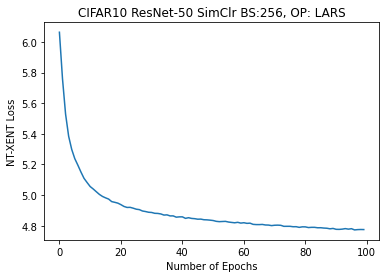

In [6]:
plt.xlabel("Number of Epochs")
plt.ylabel("NT-XENT Loss")
plt.title("CIFAR10 ResNet-50 SimClr BS:256, OP: LARS")
plt.plot(train_loss)
plt.savefig("/home/ky2446/figures/CIFAR10-RES50-SIMCLR-BS256-PD128-LARS.png")

In [7]:
with open("/home/ky2446/training-logs/CIFAR10-RES50-SIMCLR-BS256-PD128-LARS", "wb") as fp: 
    pickle.dump(train_loss, fp)